## Bibliotecas Usadas

In [1]:
# Caso queira executar o notebook localmente, remova o comentário da linha abaixo
# !pip install -r ../requirements.txt

In [2]:
# Em python, existem códigos "já prontos" chamados de Bibliotecas ou Pacotes.
# Geralmente são organizados em hierarquias para facilitar leitura.
# 1° grupo: pacotes nativos do python, 2° grupo: bibliotecas feitas por outros
# usuários e 3° grupo: pacotes do projeto atual.

# import : "Puxa" a biblioteca para o ambiente atual
# as : define um apelido
# from : permite utilizar apenas alguns algoritmos de um pacote, útil para
#        pacotes grandes

import pickle  # Responsável por salvar objetos Python em arquivos para uso futuro

import pandas as pd  # Usado para manipular tabelas na memória
import numpy as np  # Pacote numérico, que adiciona constantes como valor vazio (np.nan [not a number])
import kagglehub  # Biblioteca para download de datasets
from kagglehub import KaggleDatasetAdapter
import seaborn as sns  # Biblioteca para criação de gráficos
from seaborn import objects as so
from sklearn.preprocessing import LabelEncoder  # Algoritmo para conversão de texto para número

## Aquisição dos Dados
- Banco de dados disponível em: [Kaggle.com](https://www.kaggle.com/datasets/tamber/steam-video-games)

In [3]:
# Faz o download do banco Steam Video Games e o converte para pandas.DataFrame (df)
df = kagglehub.dataset_load(
    KaggleDatasetAdapter.PANDAS,
    'tamber/steam-video-games',
    'steam-200k.csv',
    pandas_kwargs={'header': None}, # O banco não possui header explícito, então a linha
)                                   # zero é considerada como header. Isso desabilita isso

100%|██████████| 1.46M/1.46M [00:00<00:00, 76.5MB/s]

Extracting zip of steam-200k.csv...


## Pré-processamento

In [4]:
# Permite visualizar as 5 primeiras linhas de um banco, útil para definir etapas
# de pré-processamento
df.head()

,0,1,2,3,4
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0,0
1,151603712,The Elder Scrolls V Skyrim,play,273.0,0
2,151603712,Fallout 4,purchase,1.0,0
3,151603712,Fallout 4,play,87.0,0
4,151603712,Spore,purchase,1.0,0


In [5]:
# Remoção da coluna inútil 4
df.drop(columns=[4], inplace=True)  # inplace: permite fazer alterações diretamente no objeto

In [6]:
# Renomeação das colunas
df.rename(columns={0: 'ID: Usuário', 1: 'Jogo', 2: 'Ação', 3: 'Horas Jogadas'}, inplace=True)

In [7]:
# Substituição de valores "purchase" e "play" na coluna Ação
df.loc[df['Ação'] == 'purchase', 'Ação'] = 'comprar'
df.loc[df['Ação'] == 'play', 'Ação'] = 'jogar'

In [8]:
# O banco de dados coloca 1 na coluna Horas Jogadas quando a Ação é "comprar"
# precisamos corrigir isso
df.loc[df['Ação'] == 'comprar', 'Horas Jogadas'] = np.nan

In [9]:
# transformação de texto da coluna Jogo em números únicos
le = LabelEncoder()

df.loc[:, 'ID: Jogo'] = le.fit_transform(df['Jogo'])

# o mesmo para a coluna Ação
df.loc[df['Ação'] == 'comprar', 'ID: Ação'] = 1
df.loc[df['Ação'] == 'jogar', 'ID: Ação'] = 2

col_ordem = [
    'ID: Usuário', 'ID: Jogo', 'Jogo', 'ID: Ação', 'Ação', 'Horas Jogadas'
]
df = df.reindex(columns=col_ordem)

with open('label_encoder.pkl', 'wb') as file:
    pickle.dump(le, file)

In [10]:
df.head()

,ID: Usuário,ID: Jogo,Jogo,ID: Ação,Ação,Horas Jogadas
0,151603712,4364,The Elder Scrolls V Skyrim,1.0,comprar,NaN
1,151603712,4364,The Elder Scrolls V Skyrim,2.0,jogar,273.0
2,151603712,1678,Fallout 4,1.0,comprar,NaN
3,151603712,1678,Fallout 4,2.0,jogar,87.0
4,151603712,3997,Spore,1.0,comprar,NaN


## Análise Exploratória dos Dados

In [11]:
# Linhas iniciais dos dados

df.head()

,ID: Usuário,ID: Jogo,Jogo,ID: Ação,Ação,Horas Jogadas
0,151603712,4364,The Elder Scrolls V Skyrim,1.0,comprar,NaN
1,151603712,4364,The Elder Scrolls V Skyrim,2.0,jogar,273.0
2,151603712,1678,Fallout 4,1.0,comprar,NaN
3,151603712,1678,Fallout 4,2.0,jogar,87.0
4,151603712,3997,Spore,1.0,comprar,NaN


In [12]:
# Linhas finais dos dados

df.tail()

,ID: Usuário,ID: Jogo,Jogo,ID: Ação,Ação,Horas Jogadas
199995,128470551,4585,Titan Souls,2.0,jogar,1.5
199996,128470551,1979,Grand Theft Auto Vice City,1.0,comprar,NaN
199997,128470551,1979,Grand Theft Auto Vice City,2.0,jogar,1.5
199998,128470551,3413,RUSH,1.0,comprar,NaN
199999,128470551,3413,RUSH,2.0,jogar,1.4


In [13]:
# Dimensão dos dados

print('Dimensão: (Linhas, Colunas): ', df.shape)

Dimensão: (Linhas, Colunas):  (200000, 6)


In [14]:
# Quantos usuários únicos existem nos dados?

print('Usuários únicos: ', len(df['ID: Usuário'].unique()))

Usuários únicos:  12393


In [15]:
# Quantos jogos únicos existem nos dados?

print('Jogos únicos: ', len(df['Jogo'].unique()))

Jogos únicos:  5155


In [16]:
print('Jogos mais comprados (adquiridos):')
df.loc[df['Ação'] == 'comprar', 'Jogo'].value_counts().head()

Jogos mais comprados (adquiridos):


,count
Jogo,
Dota 2,4841
Team Fortress 2,2323
Unturned,1563
Counter-Strike Global Offensive,1412
Half-Life 2 Lost Coast,981


In [17]:
print('Jogos mais jogados:')
df.loc[df['Ação'] == 'jogar', 'Jogo'].value_counts().head()

Jogos mais jogados:


,count
Jogo,
Dota 2,4841
Team Fortress 2,2323
Counter-Strike Global Offensive,1377
Unturned,1069
Left 4 Dead 2,801


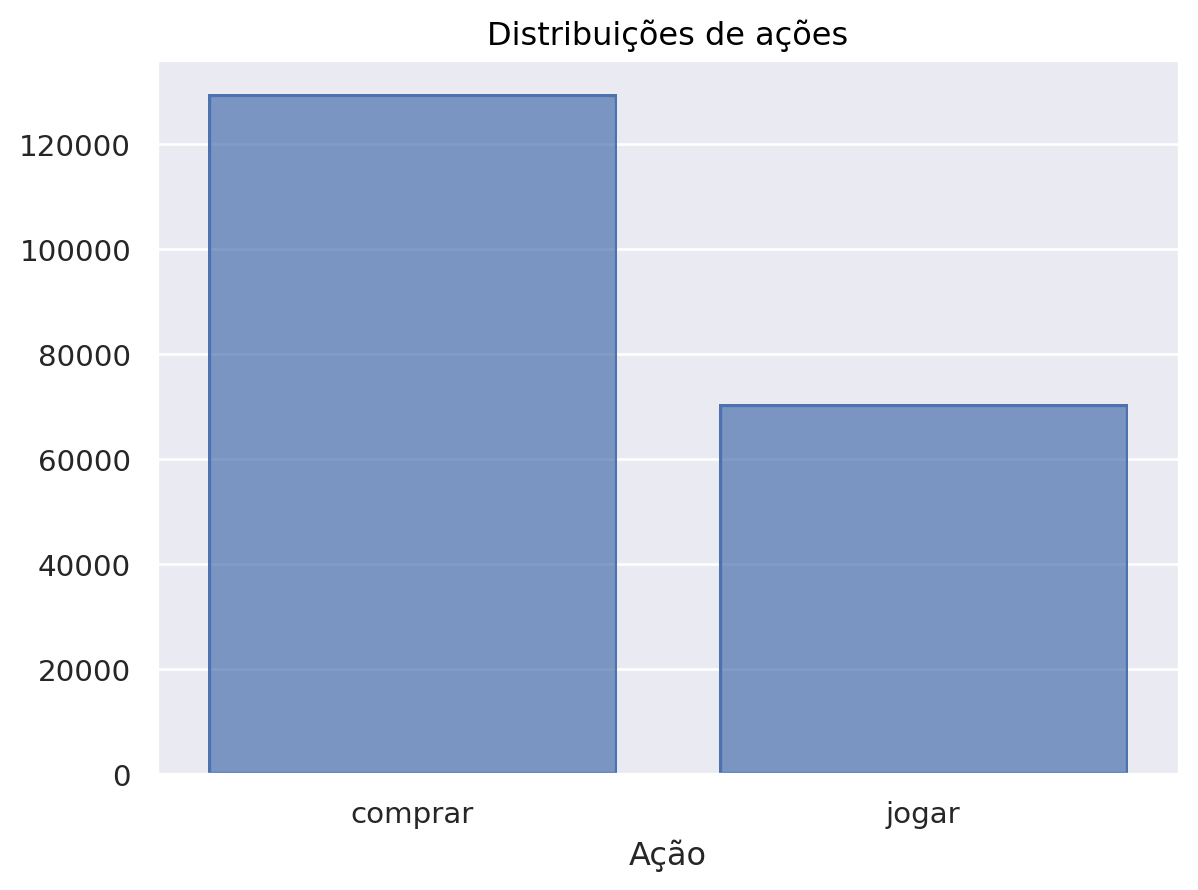

In [18]:
so.Plot(df, x='Ação').add(so.Bar(), so.Count()).label(title='Distribuições de ações')

In [19]:
# Minimo e máximo de horas jogadas

print('Menor valor de tempo jogado (h): ', df['Horas Jogadas'].min())
print('Maior valor de tempo jogado (h): ', df['Horas Jogadas'].max())

Menor valor de tempo jogado (h):  0.1
Maior valor de tempo jogado (h):  11754.0


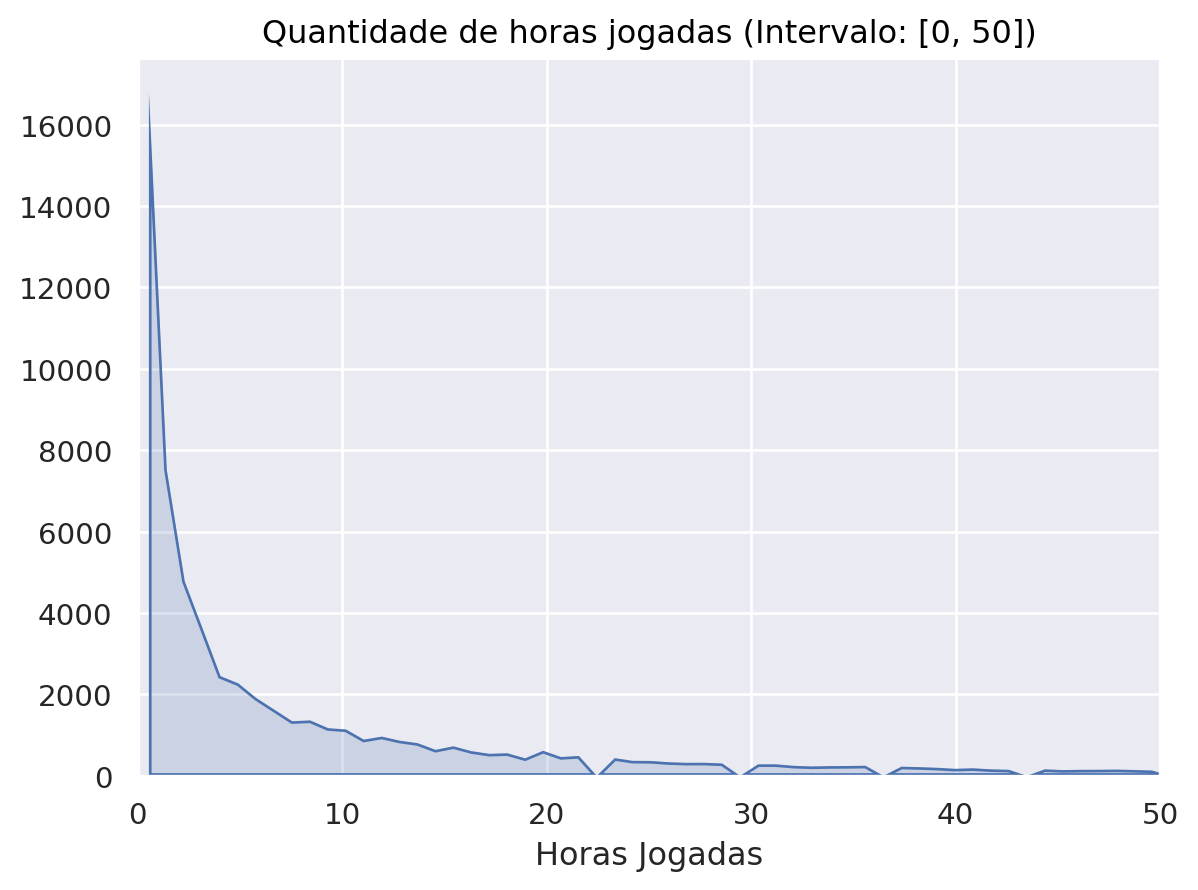

In [20]:
# Distribuição de Quantidade de Jogadores por Horas Jogadas
# (*) Intervalo [0, 50] usado devido ao valor máximo, Plot
#     ficaria esparço sem ele. Porém, não há necessidade de
#     removê-lo.

so.Plot(df, x='Horas Jogadas').add(so.Area(), so.Hist()).label(title='Quantidade de horas jogadas (Intervalo: [0, 50])').limit(x=(0, 50))

## Processamento de Interações

In [21]:
conditions = [
    df['Ação'] == 'comprar',
    df['Ação'] == 'jogar',
]

choices = [1, 2]

df['Peso'] = np.select(conditions, choices)

In [22]:
df.loc[(df['Ação'] == 'jogar') & (df['Horas Jogadas'] > 2), 'Peso'] *= 2

In [23]:
print('Resultados:')
df.head(10)

Resultados:


,ID: Usuário,ID: Jogo,Jogo,ID: Ação,Ação,Horas Jogadas,Peso
0,151603712,4364,The Elder Scrolls V Skyrim,1.0,comprar,NaN,1
1,151603712,4364,The Elder Scrolls V Skyrim,2.0,jogar,273.0,4
2,151603712,1678,Fallout 4,1.0,comprar,NaN,1
3,151603712,1678,Fallout 4,2.0,jogar,87.0,4
4,151603712,3997,Spore,1.0,comprar,NaN,1
5,151603712,3997,Spore,2.0,jogar,14.9,4
6,151603712,1679,Fallout New Vegas,1.0,comprar,NaN,1
7,151603712,1679,Fallout New Vegas,2.0,jogar,12.1,4
8,151603712,2475,Left 4 Dead 2,1.0,comprar,NaN,1
9,151603712,2475,Left 4 Dead 2,2.0,jogar,8.9,4


In [24]:
dados_treinamento = df.groupby(['ID: Usuário', 'ID: Jogo', 'Jogo'], sort=False)['Peso'].sum().reset_index()

In [25]:
dados_treinamento.head()

,ID: Usuário,ID: Jogo,Jogo,Peso
0,151603712,4364,The Elder Scrolls V Skyrim,5
1,151603712,1678,Fallout 4,5
2,151603712,3997,Spore,5
3,151603712,1679,Fallout New Vegas,5
4,151603712,2475,Left 4 Dead 2,5


In [26]:
dados_treinamento.to_parquet('dados_treinamento.parquet')